In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv('lc_loan.csv')
df.head()

list(df.columns)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [4]:
df.set_index('id',inplace=True)

In [5]:
nulldf = df.isnull().sum()
nulldf

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       18068
emp_length                      12697
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           188801
purpose                             0
title                              20
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mt

## Step 1: Drop all columns that are completely null

In [6]:
rows = len(df.url)
null_cols = []
for ind,col in nulldf.iteritems():
    if col == rows:
        null_cols.append(ind)
for col in null_cols:
    df.drop(col, axis=1,inplace=True)

In [7]:
nulldf = df.isnull().sum()
nulldf

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       18068
emp_length                      12697
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           188801
purpose                             0
title                              20
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mt

In [8]:
pd.options.display.max_columns = 999
df.head(5)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN


# Step 2: Dealing with Categorical Features

## Some assumptions that were made in this stage:
- Assuming that being grade A is the best and grade G is the worst, and that subgrade A1 is better than A2, B1 is better than B2, etc... 
- If a date for an event happening was null, assume that the event never happened



In [9]:
import re
df.term = df.term.apply(lambda x:  int(re.sub(' months','', x)))
df.grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [12]:
def convert_emp_length(x):
    if str(x) == 'nan':
        return 0
    elif x == '< 1 year':
        return .5
    elif x == '1 year':
        return 1
    elif x == '3 years':
        return 3
    elif x == '4 years':
        return 4
    elif x == '5 years':
        return 5
    elif x == '6 years':
        return 6
    elif x == '7 years':
        return 7
    elif x == '8 years':
        return 8
    elif x == '9 years':
        return 9
    elif x == '10+ years':
        return 10
    else:
        return 5
    
def convert_grade(x):
    if x == 'G':
        return 7
    elif x == 'F':
        return 6
    elif x == 'E':
        return 5
    elif x == 'D':
        return 4
    elif x == 'C':
        return 3
    elif x == 'B':
        return 2
    elif x == 'A':
        return 1
    else:
        return 0

def convert_subgrade(x):
    letter = convert_grade(x[0])
    return int(''.join([str(letter), (x[1])]))


df.grade = df.grade.apply(convert_grade)
df.sub_grade.unique()

df.sub_grade = df.sub_grade.apply(convert_subgrade)
df.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [13]:
df.emp_length = df.emp_length.apply(convert_emp_length)
df.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [14]:
home_ownership = pd.get_dummies(df.home_ownership)
df = df.join(home_ownership)
df.drop('home_ownership',axis=1,inplace=True)
df.verification_status.unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [15]:
verification = pd.get_dummies(df.verification_status)
df = df.join(verification)
df.drop('verification_status',axis=1,inplace=True)
df.issue_d.unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07', 'Dec-13', 'Nov-13', 'Oct-13', 'Sep-13', 'Aug-13',
       'Jul-13', 'Jun-13', 'May-13', 'Apr-13', 'Mar-13', 'Feb-13',
       'Jan-13', 'Dec-12', 'Nov-12', 'Oct-12', 'Sep-12', 'Aug-12',
       'Jul-12', 'Jun-12', 'May-12', 'Apr-12', 'Mar-12', 'Feb-12',
       'Jan-12', 'Dec-14', 'Nov-14', 'Oct-14', 'Sep-14'], dtype=object)

In [16]:
def convert_issue_d(x):
    if str(x) == 'nan':
        return 0
    elif 'Jan' in x:
        return re.sub('Jan', '01-01',x)
    elif 'Feb' in x:
        return re.sub('Feb', '02-01',x)
    elif 'Mar' in x:
        return re.sub('Mar', '03-01',x)
    elif 'Apr' in x:
        return re.sub('Apr', '04-01',x)
    elif 'May' in x:
        return re.sub('May', '05-01',x)
    elif 'Jun' in x:
        return re.sub('Jun', '06-01',x)
    elif 'Jul' in x:
        return re.sub('Jul', '07-01',x)
    elif 'Aug' in x:
        return re.sub('Aug', '08-01',x)
    elif 'Sep' in x:
        return re.sub('Sep', '09-01',x)
    elif 'Oct' in x:
        return re.sub('Oct', '10-01',x)
    elif 'Nov' in x:
        return re.sub('Nov', '11-01',x)
    elif 'Dec' in x:
        return re.sub('Dec', '12-01',x)

## Dealing with DateTime Features 

We want to provide numeric significance to datetime features, as dates themsevles cannot be fed into many classification or regression problems. There are several ways to tackle this problem, I chose to assign a numeric value to all dates that is calculated by finding number of days since the epoch.

In [18]:
# Turn datetime features into numerical features using time-since-epoch
import datetime

'''function to turn a datetime pd.Series into a numerical feature'''
def date_to_feat(x):
    if x == 0:
        return 0
    else:
        x = datetime.datetime.strptime(x, '%m-%d-%y')
        epoch = datetime.datetime.utcfromtimestamp(0)
        time = (x - epoch).total_seconds()/86400   
        return time

df.issue_d = df.issue_d.apply(lambda x: date_to_feat(convert_issue_d(x)))

#removing url and desc column. The desc column though is an interesting problem in itself,
#and a whole algorithm could be built around using NLP to extract important details from here

df.drop('url',axis=1,inplace=True)
df.drop('desc',axis=1,inplace=True)

#title is another column where NLP could come in handy, but for now will be removed since
# it is *mostly* captured in the purpose column
df[['purpose','title']].head(10)

df.drop('title',axis=1,inplace=True)
purpose = pd.get_dummies(df.purpose)
df = df.join(purpose)
df.drop('purpose',axis=1,inplace=True)

df.earliest_cr_line = df.earliest_cr_line.apply(lambda x: date_to_feat(convert_issue_d(x)))
df.last_pymnt_d = df.last_pymnt_d.apply(lambda x: date_to_feat(convert_issue_d(x)))
df.application_type = df.application_type.apply(lambda x: 1 if x == 'INDIVIDUAL' else 0)

# Step 3: Figure out how to handle partially Null data
- If there are a small number of rows with null values, consider deleting the rows as they could do more harm then good, or come up with a way to fill null values in a statistically meaningful way to the given feature
- If too many pieces of data are missing and you do not have an intuitive way to extrapolate meaning, it might be most beneficial to delete the feature alltogether.

## Using statistics to fill data
- If not too many data are missing, it can be appropriate to fill these missing values with statistics such as `Mean`, `Median`, `Mode`, `Max`, or `Min`. It is important to have a business understanding of the feature before deciding which statistic to use.



In [19]:
nullcount = df.isna().sum()
nullcount[nullcount !=0]

emp_title                       18068
annual_inc                          4
delinq_2yrs                        29
inq_last_6mths                     29
mths_since_last_delinq         167434
mths_since_last_record         266891
open_acc                           29
pub_rec                            29
revol_util                        251
total_acc                          29
total_rec_late_fee                  1
recoveries                          1
collection_recovery_fee             1
last_pymnt_amnt                     1
next_pymnt_d                   172631
last_credit_pull_d                 30
collections_12_mths_ex_med        146
mths_since_last_major_derog    247271
policy_code                         1
acc_now_delinq                     30
tot_coll_amt                    70277
tot_cur_bal                     70277
total_rev_hi_lim                70277
dtype: int64

In [20]:
null_columns=df.columns[df.isnull().any()]
null_columns

Index(['emp_title', 'annual_inc', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [21]:
# 'total_rec_late_fee','recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code' all have 1 null value, 
# so we will remove these null rows for ease

cols = ['total_rec_late_fee','recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code']
index = []
for col in cols:
    index.append(df[df["total_rec_late_fee"].isnull()][null_columns].index[0])

df.drop(index,inplace=True)

In [22]:
# for annual_inc, we will fill the 4 missing values with the mean

df.annual_inc.fillna(df.annual_inc.mean(),inplace=True)

In [23]:
#For now I am going to remove emp_title since there are 160349 unique categories, 
#and that is too many to do dummy variables on
df.drop('emp_title',axis=1,inplace=True)

# 'mths_since_last_delinq', 'mths_since_last_record' : NaN will be filled with 0 since 
# I am using the assumption that NaN indicated there was no such incidence of the event

df.mths_since_last_delinq.fillna(0,inplace=True)
df.mths_since_last_record.fillna(0,inplace=True)

df.open_acc.unique()

array([ 3.,  2., 10., 15.,  9.,  7.,  4., 11., 14., 12., 20.,  8.,  6.,
       17.,  5., 13., 16., 30., 21., 18., 19., 27., 23., 34., 25., 22.,
       24., 26., 32., 28., 29., 33., 31., 39., 35., 36., 38., 44., 41.,
       42.,  1., 46., 37., 47., nan, 40., 45., 49., 53., 51., 43.,  0.,
       62., 48., 50., 52., 54., 76., 58., 55., 84., 75.])

In [24]:
df.pub_rec.unique()

array([ 0.,  1.,  2.,  3.,  4.,  5., nan,  6.,  9.,  8.,  7., 11., 49.,
       10., 54., 12., 18., 19., 16., 15., 14.])

In [25]:
# open_acc and pub_rec NaN's I will fill with the median value, since 
# I am unsure what assumptions to make about therse values at this time and there are only 29 such values to fill

df.open_acc.fillna(df.open_acc.median(),inplace=True)
df.pub_rec.fillna(df.pub_rec.median(),inplace=True)

# next_pymnt_d has 172631 NaNs. For now I am going to ignore this row
# as I dont think it will have a big impact in our model
df.drop('next_pymnt_d',axis=1,inplace=True)

# last_credit_pull_d  will be filled with the mean value of time since epoch
df.last_credit_pull_d.unique()
df.last_credit_pull_d = df.last_credit_pull_d.apply(lambda x: date_to_feat(convert_issue_d(x)))

mean = df.last_credit_pull_d[df.last_credit_pull_d!=0].mean()
df.last_credit_pull_d.loc[df.last_credit_pull_d ==0] = mean

# for collections_12_mths_ex_med, I will set NaNs to median
df.collections_12_mths_ex_med.unique()
df.collections_12_mths_ex_med.fillna(df.collections_12_mths_ex_med.median(),inplace=True)

#mths_since_last_major_derog and mths_since_last_delinq most likely means it never happened, so it will be filled with the max value
maxmnths = df.mths_since_last_delinq.max()
df.mths_since_last_delinq.fillna(df.mths_since_last_delinq.max(),inplace=True)
df.mths_since_last_major_derog.fillna(df.mths_since_last_delinq.max(),inplace=True)

df.acc_now_delinq.unique()

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


array([ 0.,  1., nan,  2.,  3.,  5.,  4.])

In [26]:
df.acc_now_delinq.fillna(df.acc_now_delinq.median(),inplace=True)

In [27]:
# Im not sure how to interpret delinq_2yrs so I will fill it with median
df.delinq_2yrs.unique()

df.delinq_2yrs.fillna(df.delinq_2yrs.median(),inplace=True)
df.inq_last_6mths.fillna(df.inq_last_6mths.median(),inplace=True)
df.revol_util.fillna(df.revol_util.mean(),inplace=True)
df.total_acc.fillna(0,inplace=True)

In [28]:
'''
tot_coll_amt, tot_cur_bal, and total_rev_hi_lim have too high of a Null count, and
I do not know what these columns mean (I can guess, but it would be easier to have a data dict)
Therefore for now we will ignore these columns all together.
'''

df.drop('tot_coll_amt',axis=1,inplace=True)
df.drop('tot_cur_bal',axis=1,inplace=True)
df.drop('total_rev_hi_lim',axis=1,inplace=True)


df.drop('pymnt_plan',axis=1,inplace=True)
df.drop('zip_code',axis=1,inplace=True)
df.drop('addr_state',axis=1,inplace=True)
df.drop('initial_list_status',axis=1,inplace=True)


df.loan_status.unique()
loan_status = df.loan_status
#status = pd.get_dummies(df.loan_status)
#df = df.join(status)
df.drop('loan_status',axis=1,inplace=True)

nullcount = df.isna().sum()
nullcount[nullcount !=0]

Series([], dtype: int64)

# Feature Extraction

- First, we will remove features with high multicollinearity from our dataset
- Then, we will remove features that we wouldn't know prior to accepting a customer for a loan

In [29]:
dffeatures = df[['member_id', 'loan_amnt', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'annual_inc', 'issue_d', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths','last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type','MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT',
       'Not Verified', 'Source Verified', 'Verified', 'car', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding']]

''' 
Variance Inflation factor function will calculate and remove
variables with high multicollinearity from our model.

One recommendation from the documentation is that if VIF is greater 
than 5, then the explanatory variable given by exog_idx 
is highly collinear with the other explanatory variables, 
and the parameter estimates will have large standard errors
because of this. Thus, we remove all such variables
'''

from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

vif = calculate_vif_(dffeatures)

/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


dropping 'MORTGAGE' at index: 19
dropping 'Not Verified' at index: 23
dropping 'car' at index: 25
dropping 'sub_grade' at index: 6
dropping 'loan_amnt' at index: 1
dropping 'debt_consolidation' at index: 24
dropping 'int_rate' at index: 2
Remaining variables:
Index(['member_id', 'term', 'installment', 'grade', 'emp_length', 'annual_inc',
       'issue_d', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'NONE', 'OTHER', 'OWN', 'RENT', 'Source Verified', 'Verified',
       'credit_card', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding'],
      dtype='object')


/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


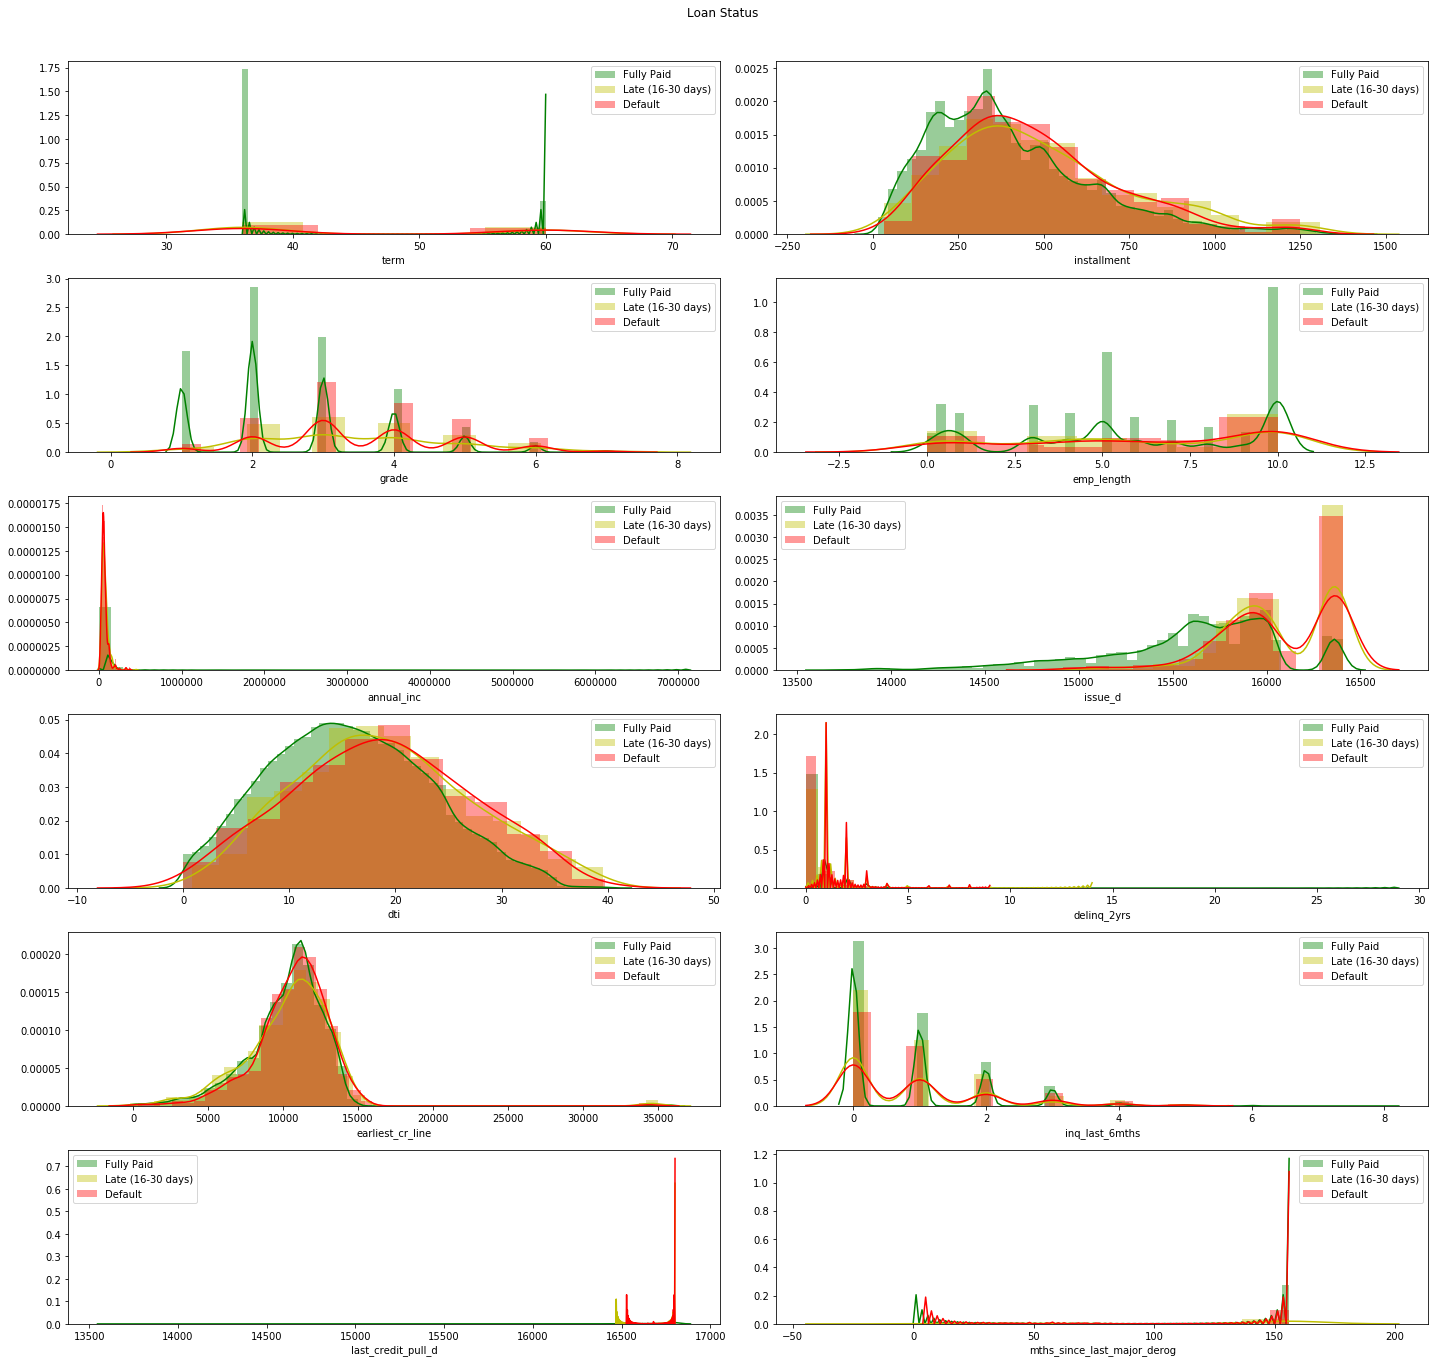

In [30]:
member_id = vif['member_id']
vif.drop('member_id',axis=1,inplace=True)

relavent_columns = ['term', 'installment', 'grade', 'emp_length', 'annual_inc',
       'issue_d', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'last_credit_pull_d', 'mths_since_last_major_derog', ]

df_relcols = vif[relavent_columns]
dfwlabel = df_relcols.join(loan_status)


import seaborn as sns
fig = plt.figure(figsize = (20, 25))
j = 0
for i in relavent_columns:
    plt.subplot(8, 2, j+1)
    j += 1
    sns.distplot(dfwlabel[i][loan_status=='Fully Paid'], color='g', label = 'Fully Paid')
    sns.distplot(dfwlabel[i][loan_status=='Late (16-30 days)'], color='y', label = 'Late (16-30 days)')
    sns.distplot(dfwlabel[i][loan_status=='Default'], color='r', label = 'Default')
    plt.legend(loc='best')
fig.suptitle('Loan Status')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()




# Model Development

## Binary Classification

The first method is to classify users into 2 categories "Should not loan to" and "Should loan to". This in itself is not enough to maximize profitability, but it will serve as an interesting starting point to start doing deeper model development and analysis. For this method, we will explor `K Means Clustering from sklearn`

## Classifying Loan Status

Another classification route to take would be to predict what loan status the loan will take given the feature. set.  We will try a random forest classifier and xgboost for this method.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
#train test split
train,test = train_test_split(df,test_size=0.20, random_state=0)

# 3 clusters is the best fit of our data

kmeans = KMeans(n_cl usters=3, random_state=0).fit(train)
predictions = kmeans.predict(test)

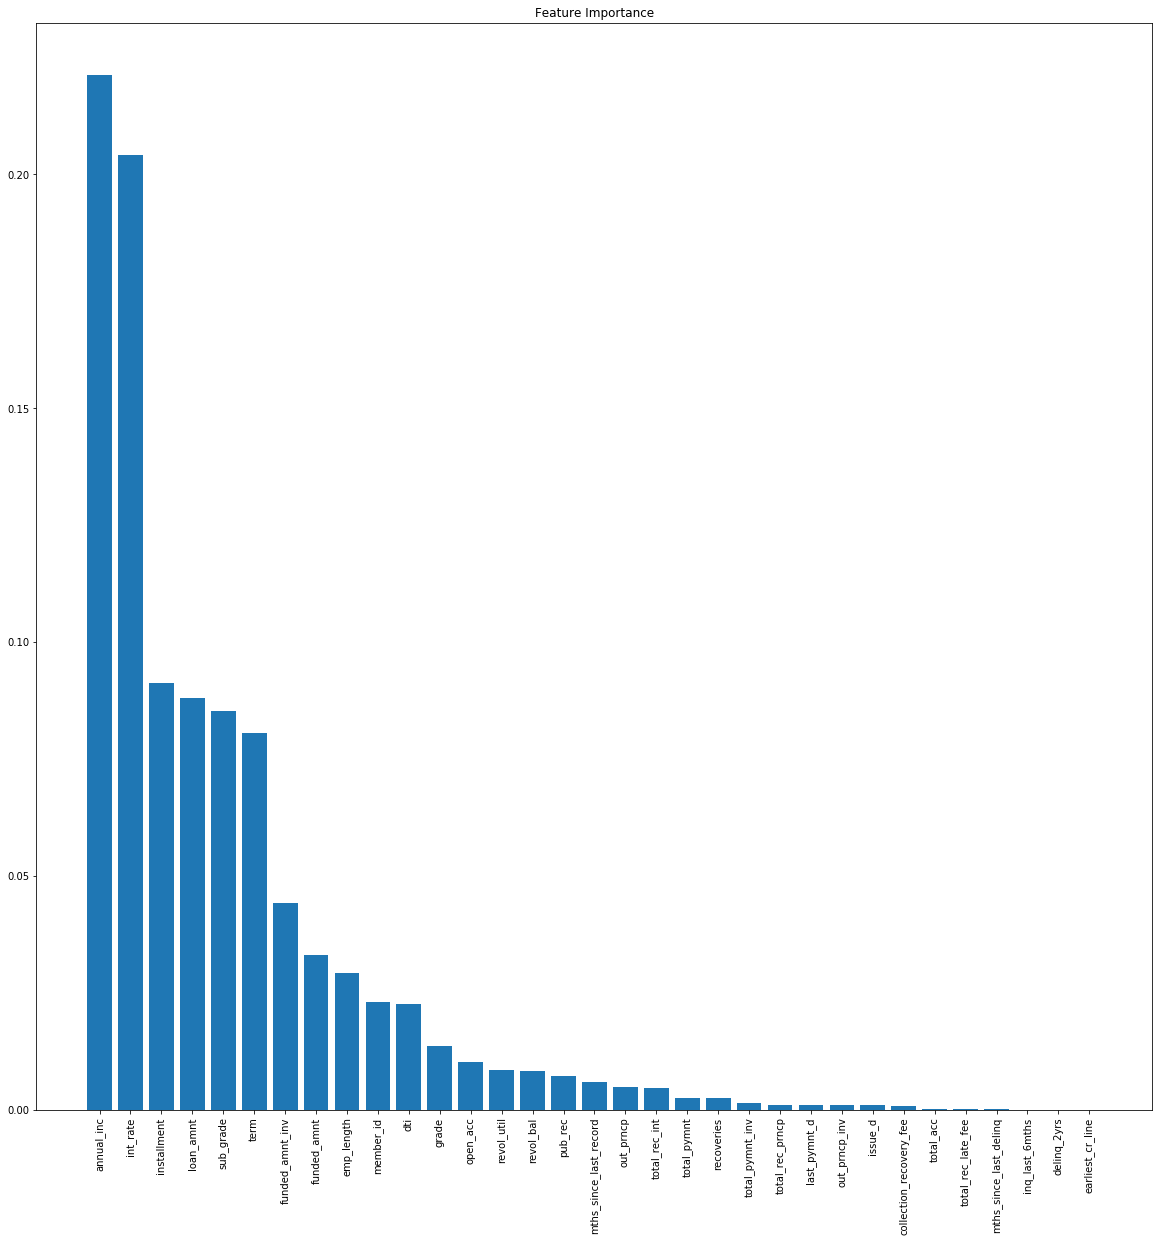

Accuracy: 76.37%


array([5, 5, 1, ..., 1, 5, 1])

In [32]:
# Loan Classification:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'])
labels = le.transform(loan_status)
labels

from sklearn.ensemble import RandomForestClassifier

#new train test split
x_train, x_test, y_train, y_test = train_test_split(vif, labels, test_size=0.20, stratify=labels, random_state=0)


# Train A Decision Tree Model

# Create decision tree classifer object
clf = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model
model = clf.fit(x_train, y_train)

# Calculate feature importances
importances = model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [df.columns[i] for i in indices]

# Create plot
plt.figure(figsize=[20,20])

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(x_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(x_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

from sklearn.metrics import accuracy_score

rf_predictions = clf.predict(x_test)

# evaluate predictions
accuracy = accuracy_score(y_test, rf_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

rf_predictions

In [ ]:
from xgboost import XGBClassifier

# fit model no training data
model = XGBClassifier()
model.fit(x_train, y_train)

# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
